# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Data Analysis and Visualization
# Preprocessing Data

In [2]:
data = pd.read_csv(r"C:\Users\hp\Startup_Profit_Prediction\50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [48]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

# Plotting

## Plot Correlation Matrix

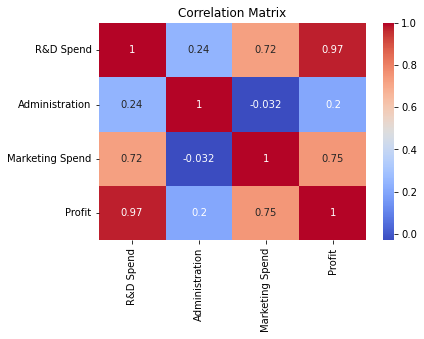

In [49]:
co_matrix = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
pt.title('Correlation Matrix')
pt.show()

## Scatter plots

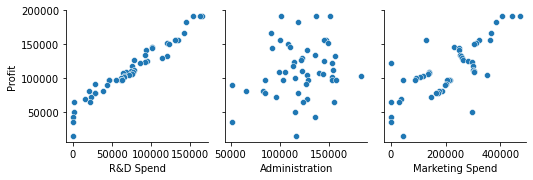

In [50]:
sb.pairplot(data, x_vars = ['R&D Spend', 'Administration', 'Marketing Spend'], y_vars = 'Profit', kind = 'scatter')
pt.show()

## Regression plots

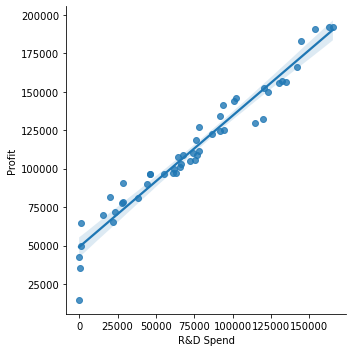

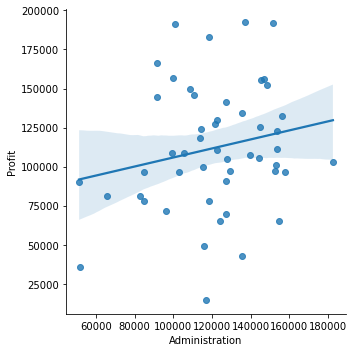

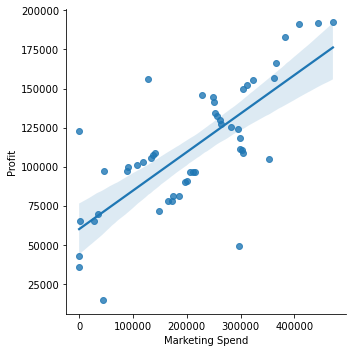

In [51]:
sb.lmplot(x = 'R&D Spend', y = 'Profit', data = data)
sb.lmplot(x = 'Administration', y = 'Profit', data = data)
sb.lmplot(x = 'Marketing Spend', y = 'Profit', data = data)
pt.show()

## Distribution Plot

C:\Users\rsrsp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


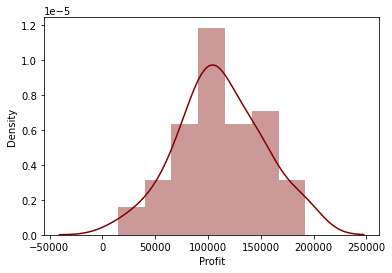

In [52]:
sb.distplot(data['Profit'], color = 'maroon')
pt.show()

## Histogram Plot

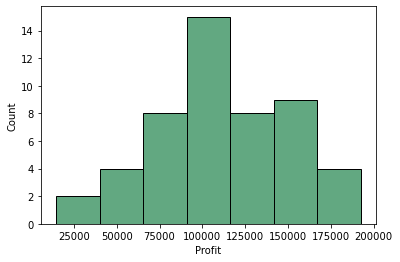

In [53]:
sb.histplot(data['Profit'], color = 'seagreen')
pt.show()

# Models Training, Testing and Evaluation

In [54]:
y = data['Profit']
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Linear Regression

In [56]:
linear_reg = LinearRegression()

In [57]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [58]:
linear_reg_pred = linear_reg.predict(X_test)

In [59]:
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

In [60]:
linear_reg_r2

0.9000653083037321

In [61]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)

In [62]:
linear_reg_mse

80926321.22295155

In [63]:
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)

In [64]:
linear_reg_mae

6979.1522523704

## Random Forest Regressor

In [65]:
randfor_reg = RandomForestRegressor()

In [87]:
randfor_reg.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
randfor_reg_pred = randfor_reg.predict(X_test)

In [89]:
randfor_reg_r2 = r2_score(y_test, randfor_reg_pred)

In [90]:
randfor_reg_r2

0.907739488115063

In [91]:
randfor_reg_mse = mean_squared_error(y_test, randfor_reg_pred)

In [92]:
randfor_reg_mse

74711831.23961332

In [93]:
randfor_reg_mae = mean_absolute_error(y_test, randfor_reg_pred)

In [94]:
randfor_reg_mae

6348.794889999988

## Decision Tree

In [174]:
dectree_reg = DecisionTreeRegressor()

In [175]:
dectree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [176]:
dectree_reg_pred = dectree_reg.predict(X_test)

In [177]:
dectree_reg_r2 = r2_score(y_test, dectree_reg_pred)

In [178]:
dectree_reg_r2

0.8265928991371172

In [179]:
dectree_reg_mse = mean_squared_error(y_test, dectree_reg_pred)

In [180]:
dectree_reg_mse

140423695.80147

In [181]:
dectree_reg_mae = mean_absolute_error(y_test, dectree_reg_pred)

In [182]:
dectree_reg_mae

9050.414999999997

## Lasso Regression

In [183]:
lasso_reg = Lasso(alpha = 0.1)

In [184]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [185]:
lasso_reg_pred = lasso_reg.predict(X_test)

In [186]:
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

In [187]:
lasso_reg_r2

0.9000653083601801

In [188]:
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

In [189]:
lasso_reg_mse

80926321.17724043

In [190]:
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_pred)

In [191]:
lasso_reg_mae

6979.152250714324

## Ridge Regression

In [192]:
ridge_reg = Ridge(alpha = 0.1)

In [193]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [194]:
ridge_reg_pred = ridge_reg.predict(X_test)

In [195]:
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)

In [196]:
ridge_reg_r2

0.9000653083036411

In [197]:
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)

In [198]:
ridge_reg_mse

80926321.22302528

In [199]:
ridge_reg_mae = mean_absolute_error(y_test, ridge_reg_pred)

In [200]:
ridge_reg_mae

6979.152252376222

## ElasticNet Regression

In [201]:
elasticnet_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [202]:
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [203]:
elasticnet_reg_pred = elasticnet_reg.predict(X_test)

In [204]:
elasticnet_reg_r2 = r2_score(y_test, elasticnet_reg_pred)

In [205]:
elasticnet_reg_r2

0.9000653083311747

In [206]:
elasticnet_reg_mse = mean_squared_error(y_test, elasticnet_reg_pred)

In [207]:
elasticnet_reg_mse

80926321.20072877

In [208]:
elasticnet_reg_mae = mean_absolute_error(y_test, elasticnet_reg_pred)

In [209]:
elasticnet_reg_mae

6979.152251598576

## Support Vector Regression (SVR)

In [210]:
svr = SVR(kernel = 'linear')

In [211]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [212]:
svr_pred = svr.predict(X_test)

In [213]:
svr_r2 = r2_score(y_test, svr_pred)

In [214]:
svr_r2

0.8717792695119354

In [215]:
svr_mse = mean_squared_error(y_test, svr_pred)

In [216]:
svr_mse

103832131.23282321

In [217]:
svr_mae = mean_absolute_error(y_test, svr_pred)

In [218]:
svr_mae

7702.62323434256

## XGBoost

In [219]:
xgb_reg = xgb.XGBRegressor()

In [220]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [221]:
xgb_reg_pred = xgb_reg.predict(X_test)

In [222]:
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)

In [223]:
xgb_reg_r2

0.904580278463066

In [224]:
xgb_reg_mse = mean_squared_error(y_true = y_test, y_pred = xgb_reg_pred)

In [225]:
xgb_reg_mse

77270134.17494626

In [226]:
xgb_reg_mae = mean_absolute_error(y_true = y_test, y_pred = xgb_reg_pred)

In [227]:
xgb_reg_mae

7779.489250000001

## Feedforward Neural Networks (FNN)

In [228]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
fnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [230]:
fnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [231]:
fnn_model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
2/2 [==============================] - 2s 20ms/step - loss: 15096804352.0000
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 15096791040.0000
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 15096780800.0000
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 15096768512.0000
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 15096758272.0000
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 15096748032.0000
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 15096738816.0000
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 15096728576.0000
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 15096719360.0000
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 15096709120.0000


In [232]:
fnn_predict = fnn_model.predict(X_test_scaled)

1/1 [==============================] - 0s 279ms/step


In [233]:
fnn_r2 = r2_score(y_test, fnn_predict)

In [234]:
fnn_r2

-11.72853816358919

In [235]:
fnn_mse = mean_squared_error(y_test, fnn_predict)

In [236]:
fnn_mse

10307469314.619251

In [237]:
fnn_mae = mean_absolute_error(y_test, fnn_predict)

In [238]:
fnn_mae

97456.04920916699

# Best Model and Prediction

In [242]:
results = pd.DataFrame({
    'Model': ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'Decision Tree', 'SVR', 'XGBoost', 'FNN'],
    'R2 Score': [linear_reg_r2, lasso_reg_r2, ridge_reg_r2, elasticnet_reg_r2, randfor_reg_r2, dectree_reg_r2, 
                 svr_r2, xgb_reg_r2, fnn_r2],
    'MAE': [linear_reg_mae, lasso_reg_mae, ridge_reg_mae, elasticnet_reg_mae, randfor_reg_mae, dectree_reg_mae, 
            svr_mae, xgb_reg_mae, fnn_mae],
    'MSE': [linear_reg_mse, lasso_reg_mse, ridge_reg_mse, elasticnet_reg_mse, randfor_reg_mse, dectree_reg_mse, 
            svr_mse, xgb_reg_mse, fnn_mse]
})

In [243]:
results

,Model,R2 Score,MAE,MSE
0,Linear,0.900065,6979.152252,8.092632e+07
1,Lasso,0.900065,6979.152251,8.092632e+07
2,Ridge,0.900065,6979.152252,8.092632e+07
3,ElasticNet,0.900065,6979.152252,8.092632e+07
4,Random Forest,0.907739,6348.794890,7.471183e+07
5,Decision Tree,0.826593,9050.415000,1.404237e+08
6,SVR,0.871779,7702.623234,1.038321e+08
7,XGBoost,0.904580,7779.489250,7.727013e+07
8,FNN,-11.728538,97456.049209,1.030747e+10


In [244]:
results['MSE Rank'] = results['MSE'].rank(ascending=True, method='min')
results['MAE Rank'] = results['MAE'].rank(ascending=True, method='min')
results['R2 Rank'] = results['R2 Score'].rank(ascending=False, method='min')

results['Total Rank'] = results['MSE Rank'] + results['MAE Rank'] + results['R2 Rank']

results_sorted_by_rank = results.sort_values('Total Rank')

best_model_rank = results_sorted_by_rank.iloc[0]['Model']

print("Best model based on Total Rank:", best_model_rank)

Best model based on Total Rank: Random Forest


In [245]:
rd_spend = float(input("Enter R & D Spend : "))
admin = float(input("Enter Administration Cost : "))
market = float(input("Enter Marketing Spend : "))
print("The predicted profit of the Startup is : ", float(randfor_reg.predict([[rd_spend, admin, market]])))

Enter R & D Spend : 100000
Enter Administration Cost : 150000
Enter Marketing Spend : 300000
The predicted profit of the Startup is :  136112.7186999999


C:\Users\rsrsp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
